# Caso d'uso aziendale: Previsione della Progressione del Diabete in Pazienti a Rischio

MedPredict s.r.l. è una giovane azienda che fornisce soluzioni di machine learning per migliorare la gestione delle malattie croniche, come il diabete. Con l'aumento dei pazienti a rischio, la capacità di prevedere la progressione del diabete diventa cruciale per migliorare i trattamenti e ridurre le complicazioni a lungo termine. MedPredict ha deciso di implementare un modello di regressione predittiva che, utilizzando dati clinici dei pazienti, possa fornire previsioni accurate sulla progressione della malattia. Questo modello sarà utilizzato da medici e specialisti per personalizzare i piani terapeutici e monitorare meglio l’evoluzione del diabete nei pazienti a rischio.

## Dataset Utilizzato
Il dataset scelto per questo progetto è il Diabetes dataset fornito da scikit-learn, che contiene informazioni cliniche su pazienti affetti da diabete e un target che rappresenta la progressione della malattia. Le variabili indipendenti includono parametri come:

  - Age: età del paziente
  - Sex: genere
  - BMI: indice di massa corporea
  - BP: pressione sanguigna media
  - S1: colesterolo sierico totale
  - S2: lipoproteine a bassa densità
  - S3: lipoproteine ad alta densità
  - S4: rapporto tra colesterolo totale e HDL
  - S5: trigliceridi
  - S6: livello di glicemia

Il target è una misura quantitativa che riflette la progressione del diabete.

## Obiettivo del Progetto
Il nostro obiettivo è sviluppare un modello di regressione che, utilizzando i dati clinici disponibili, riesca a prevedere la progressione della malattia per ciascun paziente. La soluzione sarà integrata nei sistemi aziendali di gestione sanitaria per fornire previsioni personalizzate e dati predittivi ai medici, aiutandoli a prendere decisioni più informate.

## Valore Aggiunto
Il valore aggiunto per MedPredict e i suoi clienti è rappresentato dai seguenti vantaggi:

- Miglioramento della cura personalizzata: I medici saranno in grado di prevedere la progressione del diabete nei pazienti e adattare i piani di trattamento in anticipo.
- Riduzione dei costi sanitari: Prevedendo con maggiore accuratezza l'evoluzione della malattia, è possibile evitare complicazioni a lungo termine che richiederebbero interventi più costosi.
- Integrazione in piattaforme sanitarie: Il modello sarà parte integrante di una piattaforma di monitoraggio dei pazienti, migliorando la gestione a lungo termine e l'efficacia dei trattamenti.
- Strumento di supporto decisionale: Fornire previsioni precise permette ai medici di prendere decisioni più informate, basate su dati clinici storici e attuali.

## Conclusione
La realizzazione di questo modello di previsione della progressione del diabete rappresenta un enorme valore aggiunto per MedPredict s.r.l. e per i professionisti sanitari che collaborano con l'azienda. Grazie a questo strumento, i medici potranno adottare un approccio più proattivo nella gestione del diabete, migliorando la qualità della vita dei pazienti e ottimizzando le risorse sanitarie. L'accuratezza del modello permetterà decisioni cliniche più precise e un monitoraggio più efficiente delle malattie croniche.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso

## Caricamento del dataset ed EDA

In [ ]:
dataset = load_diabetes()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


In [ ]:
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

Si procede ad analizzare eventuali correlazioni delle feature con il target

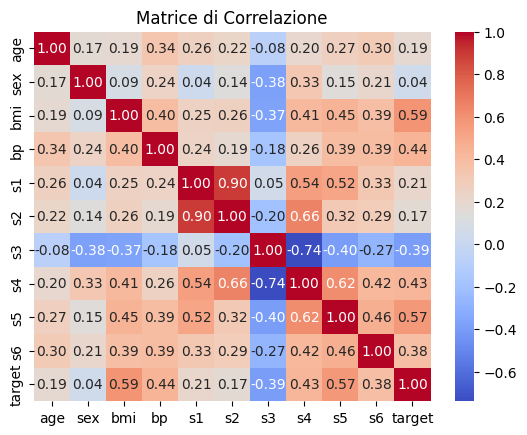

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice di Correlazione')
plt.show()

## Pre-processing

Si procede alla pulizia del dataset ed al suo preprocessing.

Nonostante il dataset sia già pretrattato si procede a realizzare una standardizzazione delle feature e poi si passa alle operazioni necessarie alla ricerca di un modello ottimale.

In [ ]:
X = df.drop('target', axis=1).values
y =df['target'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
X_train.shape

(353, 10)

In [ ]:
y_train.shape

(353,)

## Selezione delle feature e del modello

Si procede a scegliere il modello per effettuare le previsioni.
Si cercherà d'investigare sul grado del modello da usare, e valutare l'introduzione della Regressione Lasso per effettuare la selezione delle variabili più significative per la previsione.

In [ ]:
#creiamo diversi modelli polinomiali e li mettiamo a confronto tra di loro
degrees = [1,2,3,4,5,6,7,8,9,10]

n_features = X_train.shape[1]

results =[]

for d in degrees:
  poly = PolynomialFeatures(d)
  X_train_poly = poly.fit_transform(X_train)

  lr = LinearRegression()
  lr.fit(X_train_poly, y_train)

  y_pred = lr.predict(X_train_poly)
  mse = mean_squared_error(y_train, y_pred)
  r2 = r2_score(y_train, y_pred)

  results.append({
      "degree":d,
        "mse":mse,
        "r2":r2
  })

for res in results:
   print(f"Degree: {res['degree']}, MSE: {res['mse']:.2f}, R2: {res['r2']:.2f}")

Degree: 1, MSE: 2735.59, R2: 0.53
Degree: 2, MSE: 2146.54, R2: 0.63
Degree: 3, MSE: 702.41, R2: 0.88
Degree: 4, MSE: 0.00, R2: 1.00
Degree: 5, MSE: 0.00, R2: 1.00
Degree: 6, MSE: 0.00, R2: 1.00
Degree: 7, MSE: 0.00, R2: 1.00
Degree: 8, MSE: 0.00, R2: 1.00
Degree: 9, MSE: 0.00, R2: 1.00
Degree: 10, MSE: 0.00, R2: 1.00


Viste le metriche ottenute, proviamo ad analizzare la bontà dei modelli fino al 4° grado, gli altri verosimilmente saranno soggetti ad overfitting.

In [ ]:
def evaluate_model(model, dataset):
  X, y = dataset
  y_pred = model.predict(X)
  return mean_squared_error(y, y_pred), r2_score(y, y_pred)

In [ ]:
def test_poly_model(degree, train_dataset, test_dataset):
  X_tr, y_tr = train_dataset
  X_t, y_t = test_dataset
  metrics = {}

  poly = PolynomialFeatures(degree)
  X_train_poly = poly.fit_transform(X_tr)
  X_test_poly = poly.transform(X_t)

  lr = LinearRegression()
  lr.fit(X_train_poly, y_tr)

  mse_train, r2_train = evaluate_model(lr, (X_train_poly, y_tr))
  mse_test, r2_test = evaluate_model(lr, (X_test_poly, y_t))

  metrics = {"degree":degree,
             "train":{
                 "MSE":mse_train,
                 "R2": r2_train
             },
             "test":{
                 "MSE":mse_test,
                 "R2": r2_test
             }}
  return metrics

In [ ]:
#valutiamo i modelli
evaluation = []
for i in range(1,5):
  single_model_metrics = test_poly_model(i, (X_train, y_train), (X_test, y_test))
  evaluation.append(single_model_metrics)

for metrics in evaluation:
  print(metrics)

{'degree': 1, 'train': {'MSE': 2735.587418767414, 'R2': 0.5272560187243371}, 'test': {'MSE': 3395.269261023475, 'R2': 0.46241292338160345}}
{'degree': 2, 'train': {'MSE': 2146.5403994881917, 'R2': 0.6290507671363958}, 'test': {'MSE': 4353.816044867991, 'R2': 0.3106422319538473}}
{'degree': 3, 'train': {'MSE': 702.4113515607344, 'R2': 0.8786144662927062}, 'test': {'MSE': 102861.11633386383, 'R2': -15.286427548593867}}
{'degree': 4, 'train': {'MSE': 2.3585963146753792e-24, 'R2': 1.0}, 'test': {'MSE': 112148.97202918713, 'R2': -16.75701229679651}}


Date le perfomance abbastanza scarse del modello, si prova ad utilizzare una regressione LASSO per vedere se effettuando una feature selection è possibile andare a migliorarne le prestazioni. Si considererà un modello di primo grado viste le migliori perfomance sul dataset di test.

Verranno valutati diversi valori di Alpha.

In [ ]:
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10, 100]

results = []

for alpha in alpha_values:
  lasso_model = Lasso(alpha=alpha,  max_iter=10000)
  lasso_model.fit(X_train, y_train)

  y_pred_train = lasso_model.predict(X_train)
  y_pred_test = lasso_model.predict(X_test)

  train_mse = mean_squared_error(y_train, y_pred_train)
  test_mse = mean_squared_error(y_test, y_pred_test)
  train_r2 = r2_score(y_train, y_pred_train)
  test_r2 = r2_score(y_test, y_pred_test)

  results.append({
        'alpha': alpha,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_r2': train_r2,
        'test_r2': test_r2
    })


for result in results:
    print(f"Alpha: {result['alpha']}")
    print(f"  Train MSE: {result['train_mse']:.2f}, Test MSE: {result['test_mse']:.2f}")
    print(f"  Train R2: {result['train_r2']:.2f}, Test R2: {result['test_r2']:.2f}")
    print("")

Alpha: 0.1
  Train MSE: 2737.62, Test MSE: 3400.60
  Train R2: 0.53, Test R2: 0.46

Alpha: 0.2
  Train MSE: 2743.67, Test MSE: 3409.43
  Train R2: 0.53, Test R2: 0.46

Alpha: 0.3
  Train MSE: 2747.84, Test MSE: 3413.15
  Train R2: 0.53, Test R2: 0.46

Alpha: 0.4
  Train MSE: 2748.85, Test MSE: 3412.03
  Train R2: 0.52, Test R2: 0.46

Alpha: 0.5
  Train MSE: 2750.16, Test MSE: 3411.23
  Train R2: 0.52, Test R2: 0.46

Alpha: 0.6
  Train MSE: 2751.76, Test MSE: 3410.76
  Train R2: 0.52, Test R2: 0.46

Alpha: 0.7
  Train MSE: 2753.64, Test MSE: 3410.63
  Train R2: 0.52, Test R2: 0.46

Alpha: 0.8
  Train MSE: 2755.82, Test MSE: 3410.83
  Train R2: 0.52, Test R2: 0.46

Alpha: 0.9
  Train MSE: 2758.29, Test MSE: 3411.36
  Train R2: 0.52, Test R2: 0.46

Alpha: 1
  Train MSE: 2761.04, Test MSE: 3412.23
  Train R2: 0.52, Test R2: 0.46

Alpha: 10
  Train MSE: 3104.07, Test MSE: 3793.49
  Train R2: 0.46, Test R2: 0.40

Alpha: 100
  Train MSE: 5786.62, Test MSE: 6544.12
  Train R2: 0.00, Test R2: -

Come si può vedere non c'è un sostanziale miglioramento delle prestazioni del modello.
Tra i valori di alpha considerati, si sceglie il valore di 0.1.

In [ ]:
#si riscrive quindi il modello scelto
lr = Lasso(alpha = 0.1)
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

#si calcolano le metriche del modello
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Train MSE: {train_mse:.2f}, Train R2: {train_r2:.2f}")
print(f"Test MSE: {test_mse:.2f}, Test R2: {test_r2:.2f}")

Train MSE: 2737.62, Train R2: 0.53
Test MSE: 3400.60, Test R2: 0.46


Si procede ad esportare il modello.

In [ ]:
import pickle

filename = 'model.pkl'

with open(filename, 'wb') as file:
  pickle.dump(lr, file)